<h1 align='center'>Курсовой проект "Real Estate Price Prediction (Предсказание цен на недвижимость)"</h1>

## Этап 1. Сбор (загрузка) данных

### 1.1 Подключение всех библиотек

In [1]:
import numpy as np
import pandas as pd

from scipy.stats import shapiro

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score as r2
from sklearn.model_selection import KFold

from datetime import datetime
from math import floor

import matplotlib
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
matplotlib.rcParams.update({"font.size": 14})

### 1.2 Загрузка данных

In [3]:
TRAIN_DATASET_PATH = "train.csv" # путь к файлу с тренировочными данными
TEST_DATASET_PATH = "test.csv" # путь к файлу с объектами, целевую переменную которых необходимо предсказать

### Data fields
<ul>
    <li>Id - идентификационный номер квартиры</li>
    <li>DistrictId - идентификационный номер района</li>
    <li>Rooms - количество комнат</li>
    <li>Square - площадь</li>
    <li>LifeSquare - жилая площадь</li>
    <li>KitchenSquare - площадь кухни</li>
    <li>Floor - этаж</li>
    <li>HouseFloor - количество этажей в доме</li>
    <li>HouseYear - год постройки дома</li>
    <li>Ecology_1, Ecology_2, Ecology_3 - экологические показатели местности</li>
    <li>Social_1, Social_2, Social_3 - социальные показатели местности</li>
    <li>Healthcare_1, Helthcare_2 - показатели местности, связанные с охраной здоровья</li>
    <li>Shops_1, Shops_2 - показатели, связанные с наличием магазинов, торговых центров</li>
    <li>Price - цена квартиры</li>
</ul>

In [4]:
train_df = pd.read_csv(TRAIN_DATASET_PATH)
train_df.head(10)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,NaN,0,0,B,305018.871089
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,B,B,30,6207,1,1183.0,1,0,B,177734.553407
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,B,B,33,5261,0,240.0,3,1,B,282078.720850
3,2352,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,168106.007630
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,B,B,33,8667,2,NaN,0,6,B,343995.102962
5,5804,99,3.0,62.528465,47.103833,6.0,9,9.0,1972,0.012339,B,B,35,5776,1,2078.0,2,4,B,161044.944138
6,8864,44,1.0,33.938750,21.772930,9.0,1,12.0,1968,0.232205,B,B,24,4860,1,80.0,0,3,B,142402.739272
7,13072,59,2.0,50.391814,32.893256,8.0,8,17.0,1986,0.019509,B,B,37,7687,11,176.0,5,5,B,326174.175191
8,9951,1,1.0,46.887892,44.628132,1.0,12,20.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,160400.401732
9,8094,6,3.0,79.867477,75.085125,1.0,3,17.0,2014,0.243205,B,B,5,1564,0,540.0,0,0,B,194756.023945


In [5]:
test_df = pd.read_csv(TEST_DATASET_PATH)
test_df.head(10)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,4567,44,1.0,36.847630,19.094182,5.0,5,9.0,1970,0.036122,B,B,24,4378,0,1036.0,1,1,B
1,5925,62,1.0,42.493907,42.568133,10.0,7,17.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A
2,960,27,2.0,59.463678,NaN,9.0,19,19.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B
3,3848,23,3.0,49.646030,33.893825,6.0,2,2.0,1965,0.014073,B,B,2,475,0,NaN,0,0,B
4,746,74,1.0,53.837056,NaN,1.0,8,17.0,1977,0.309479,B,B,35,7715,4,990.0,0,6,B
5,868,38,3.0,87.139994,53.180419,10.0,4,23.0,2011,0.060753,B,B,15,2787,2,520.0,0,7,B
6,672,62,1.0,46.269456,22.820239,11.0,8,17.0,2014,0.072158,B,B,2,629,1,NaN,0,0,A
7,2471,2,2.0,48.172969,29.924204,6.0,4,9.0,1974,0.000000,B,B,33,7425,1,NaN,2,5,B
8,4510,1,1.0,43.153761,21.017596,9.0,10,17.0,2014,0.007122,B,B,1,264,0,NaN,0,1,B
9,8354,62,2.0,62.593787,59.786844,10.0,1,16.0,1981,0.002212,B,B,39,7614,3,NaN,1,5,A


In [6]:
print(f"Размерность тренировочных данных: {train_df.shape}\nРазмерность тестовых данных: {test_df.shape}")

Размерность тренировочных данных: (10000, 20)
Размерность тестовых данных: (5000, 19)


## Этап 2. Разведочный анализ данных (EDA)

### 2.1 Анализ распределения целевой переменной

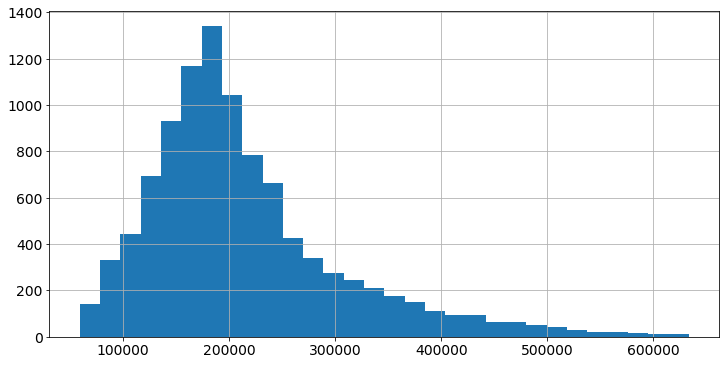

In [7]:
plt = train_df["Price"].hist(bins=30, figsize = (12, 6))

<i>Проверка распределения целевого атрибута на нормальность, которая является одним из критериев для использования линейных моделей</i>

In [8]:
shapiro_test = shapiro(train_df["Price"])

In [9]:
shapiro_test[1] < 0.05

True

<i>p-value<0.05, поэтому отклоняем нулевую гипотезу о нормальности распределения</i>

### 2.2 Описательные статистики и типы переменных в датасете

In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       7887 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Healthcare_1     5202 non-null float64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null object
Price            10000 non-null float64
dtypes: float64(8), int64(9), object(3)
memory usage: 1.5+ MB


<i>Приведение типов</i>

In [11]:
train_df.set_index("Id",inplace=True)

In [12]:
train_df.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
Id,,,,,,,,,,,,,,,,,,,
11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,NaN,0,0,B,305018.871089
3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,B,B,30,6207,1,1183.0,1,0,B,177734.553407
8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,B,B,33,5261,0,240.0,3,1,B,282078.720850
2352,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,168106.007630
13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,B,B,33,8667,2,NaN,0,6,B,343995.102962


In [13]:
train_df["DistrictId"] = train_df["DistrictId"].astype(str)

In [14]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 11809 to 7202
Data columns (total 19 columns):
DistrictId       10000 non-null object
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       7887 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Healthcare_1     5202 non-null float64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null object
Price            10000 non-null float64
dtypes: float64(8), int64(7), object(4)
memory usage: 1.5+ MB


<i>Описательные статистики (до предобработки данных)</i>

In [15]:
train_df.describe().round(2)

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00,10000.00,7887.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,5202.00,10000.00,10000.00,10000.00
mean,1.89,56.32,37.20,6.27,8.53,12.61,3990.17,0.12,24.69,5352.16,8.04,1142.90,1.32,4.23,214138.86
std,0.84,21.06,86.24,28.56,5.24,6.78,200500.26,0.12,17.53,4006.80,23.83,1021.52,1.49,4.81,92872.29
min,0.00,1.14,0.37,0.00,1.00,0.00,1910.00,0.00,0.00,168.00,0.00,0.00,0.00,0.00,59174.78
25%,1.00,41.77,22.77,1.00,4.00,9.00,1974.00,0.02,6.00,1564.00,0.00,350.00,0.00,1.00,153872.63
50%,2.00,52.51,32.78,6.00,7.00,13.00,1977.00,0.08,25.00,5285.00,2.00,900.00,1.00,3.00,192269.64
75%,2.00,65.90,45.13,9.00,12.00,17.00,2001.00,0.20,36.00,7227.00,5.00,1548.00,2.00,6.00,249135.46
max,19.00,641.07,7480.59,2014.00,42.00,117.00,20052011.00,0.52,74.00,19083.00,141.00,4849.00,6.00,23.00,633233.47


## Этап 3. Предварительная обработка данных (Feature engineering)

### 3.1 Обработка грязных данных (дупликатов, пропущенных значений, выбросов (outliers))
<ul>
    <li>Удаление строк с грязными данными</li>
    <li>Заполнение средними статистиками (среднее, медиана, мода)</li>
    <li>Бездействие</li>
    <li>Генерация новых фичей</li>
</ul>

#### Обработка дупликатов

In [16]:
print(f"Количество дупликатов по всем атрибутам: {train_df[train_df.duplicated(keep=False)].shape[0]}")

Количество дупликатов по всем атрибутам: 0


#### Обработка пропусков и выбросов

<i>Нахождение переменных численного типа</i>

In [17]:
numeric_features = list()
for column in train_df.columns:
    if train_df[column].dtype != object:
        numeric_features.append(column)

<i>Визуализация вариативности переменных и исследование аномалий</i>

In [18]:
def get_features_boxplot(df):
    import matplotlib.pyplot as plt
    fig, axes = plt.subplots(nrows=5, ncols=3, sharey=True, figsize=(21, 12))

    for n in range(len(numeric_features)):
        i, j = floor(n / 3), n % 3
        axes[i][j].set(xlabel = numeric_features[n])
        sns.boxplot(x=df[numeric_features[n]], ax=axes[i, j])
    plt.tight_layout()
    plt.show()

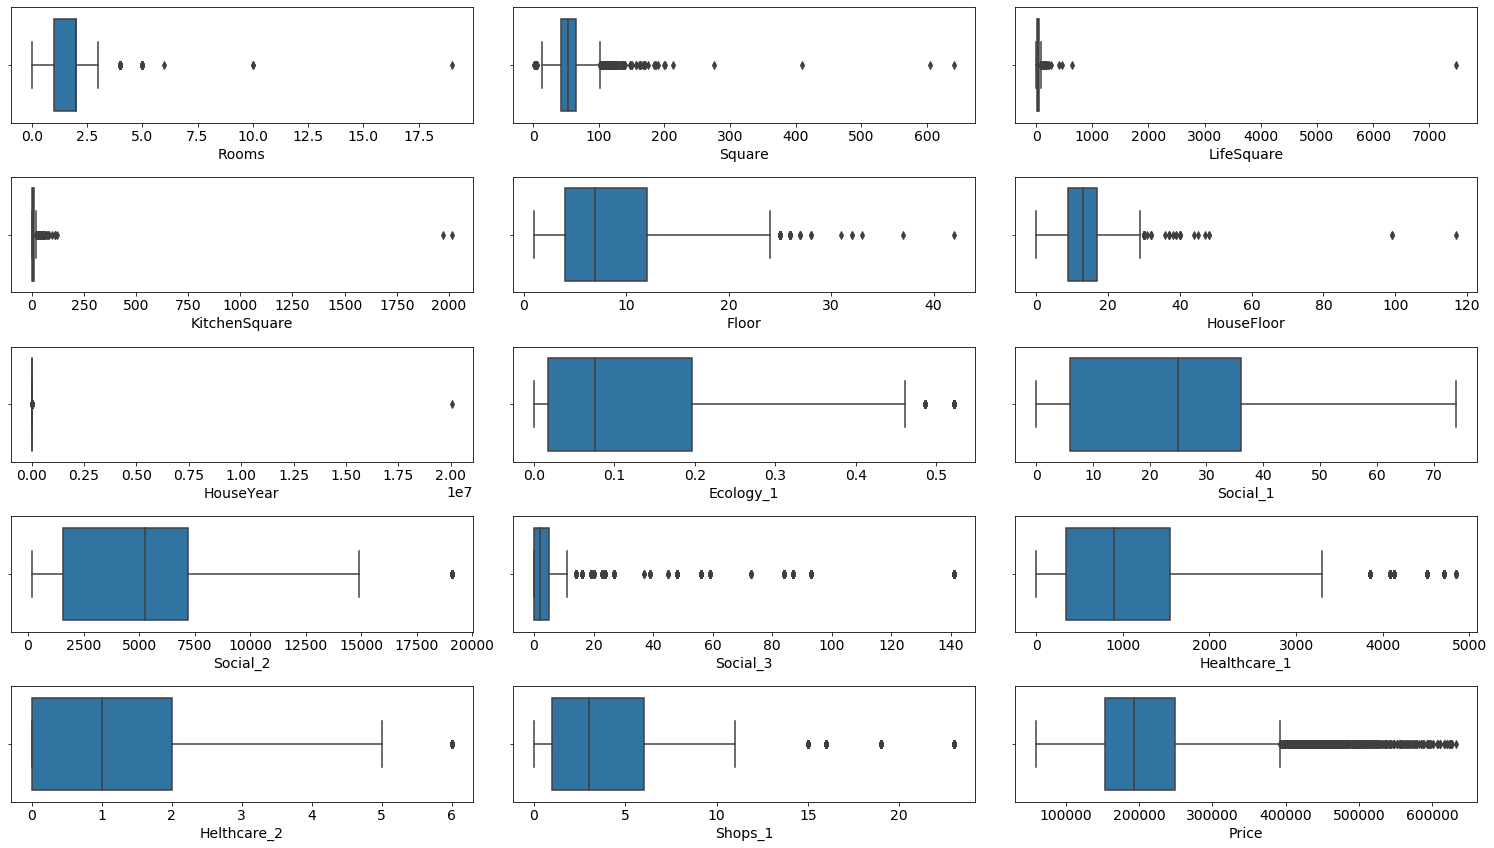

In [19]:
get_features_boxplot(train_df)

##### Rooms

In [20]:
train_df.loc[train_df["Rooms"] == 0, "Rooms"] = 1
train_df.loc[train_df["Rooms"] >= 6, "Rooms"] = 5
train_df["Rooms"].value_counts()

2.0    3880
1.0    3713
3.0    2235
4.0     150
5.0      22
Name: Rooms, dtype: int64

##### HouseFloor

In [21]:
train_df.loc[train_df["HouseFloor"] > 95, "HouseFloor"] = train_df.loc[train_df["HouseFloor"] <= 95, "HouseFloor"].max()  # Самое высокое здание в Москве имеет высоту 95 этажей
train_df["HouseFloor"].max()

48.0

##### Floor

In [22]:
train_df.loc[train_df["Floor"] > train_df["HouseFloor"], "Floor"]

Id
1190      6
367      16
8471     11
4717      2
4521     18
         ..
16258    15
9920     18
13501    18
4944     18
16265    13
Name: Floor, Length: 1825, dtype: int64

In [23]:
train_df.loc[train_df["Floor"] > train_df["HouseFloor"], "Floor"] = train_df["HouseFloor"]
# Этаж проживания не может быть больше общего количества этажей в здании

In [24]:
train_df.loc[train_df["Floor"] > train_df["HouseFloor"], "Floor"]

Series([], Name: Floor, dtype: float64)

##### Square, LifeSquare & KitchenSquare

In [25]:
# Выбросы слева
train_df.loc[train_df["KitchenSquare"] < 3, "KitchenSquare"] = 3
train_df.loc[(train_df["LifeSquare"] < 6) | (train_df["LifeSquare"].isna()), "LifeSquare"] = 6
train_df.loc[train_df["Square"] <= 10, "Square"] = 10

In [26]:
# Выбросы справа
train_df.loc[train_df["KitchenSquare"] > train_df['KitchenSquare'].quantile(.975), "KitchenSquare"] = train_df["KitchenSquare"].median()
train_df.loc[train_df["LifeSquare"] > train_df['LifeSquare'].quantile(.975), "LifeSquare"] = train_df["LifeSquare"].median()
train_df.loc[train_df["Square"] > train_df['Square'].quantile(.975), "Square"] = train_df["Square"].median()

In [27]:
train_df.loc[train_df["LifeSquare"] + train_df["KitchenSquare"] > train_df["Square"], "Square"] = train_df["LifeSquare"] + train_df["KitchenSquare"]
train_df.loc[train_df["LifeSquare"] + train_df["KitchenSquare"] > train_df["Square"], :].shape[0]

0

In [28]:
train_df.loc[train_df["LifeSquare"] + train_df["KitchenSquare"] == train_df["Square"], :]

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
Id,,,,,,,,,,,,,,,,,,,
9951,1,1.0,47.628132,44.628132,3.0,12.0,20.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,160400.401732
367,45,1.0,43.012529,40.012529,3.0,14.0,14.0,2015,0.195781,B,B,23,5212,6,NaN,3,2,B,250466.980777
847,74,2.0,77.131261,74.131261,3.0,6.0,6.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B,254005.381863
7757,27,2.0,66.441256,55.441256,11.0,12.0,12.0,1977,0.011654,B,B,4,915,0,NaN,0,0,B,138396.984612
1699,9,1.0,79.746654,76.746654,3.0,7.0,7.0,1977,0.161532,B,B,25,5648,1,30.0,2,4,B,226206.962435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2241,6,2.0,55.956655,52.956655,3.0,14.0,17.0,2014,0.243205,B,B,5,1564,0,540.0,0,0,B,172267.847132
14175,14,1.0,54.682167,44.682167,10.0,4.0,4.0,2018,0.238617,B,B,26,3889,6,705.0,3,6,B,87556.385617
7800,46,3.0,75.452792,63.452792,12.0,13.0,22.0,2014,0.188784,B,B,31,6137,4,NaN,0,1,B,500562.663412


##### Shops_1, Social_3, Healthcare_1

In [29]:
train_df["Healthcare_1"] = train_df["Healthcare_1"].fillna(train_df["Healthcare_1"].median())

In [30]:
# Выбросы справа
train_df.loc[train_df["Shops_1"] > train_df['Shops_1'].quantile(.95), "Shops_1"] = train_df["Shops_1"].median()
train_df.loc[train_df["Social_3"] > train_df['Social_3'].quantile(.95), "Social_3"] = train_df["Social_3"].median()
train_df.loc[(train_df["Healthcare_1"] > train_df['Healthcare_1'].quantile(.975)) | \
             (train_df["Healthcare_1"] < train_df['Healthcare_1'].quantile(.025)), "Healthcare_1"] \
        = train_df["Healthcare_1"].median()

##### HouseYear

In [31]:
train_df.loc[train_df["HouseYear"] == train_df["HouseYear"].max(), "HouseYear"] 
# Значение года скорее всего было некорректно внесено в датасет

Id
10814    20052011
Name: HouseYear, dtype: int64

In [32]:
train_df.loc[train_df["HouseYear"] == train_df["HouseYear"].max(), "HouseYear"] = (2005+2011)/2  # заменим на среднее между внесенными данными
train_df.loc[train_df.index == 10814, :] 

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
Id,,,,,,,,,,,,,,,,,,,
10814,109,1.0,37.26507,20.239714,9.0,9.0,12.0,2008.0,0.13633,B,B,30,6141,10.0,262.0,3,6.0,B,254084.534396


In [33]:
train_df.loc[train_df["HouseYear"] > 2020, "HouseYear"] = 2020

In [34]:
train_df.isna().sum()

DistrictId       0
Rooms            0
Square           0
LifeSquare       0
KitchenSquare    0
Floor            0
HouseFloor       0
HouseYear        0
Ecology_1        0
Ecology_2        0
Ecology_3        0
Social_1         0
Social_2         0
Social_3         0
Healthcare_1     0
Helthcare_2      0
Shops_1          0
Shops_2          0
Price            0
dtype: int64

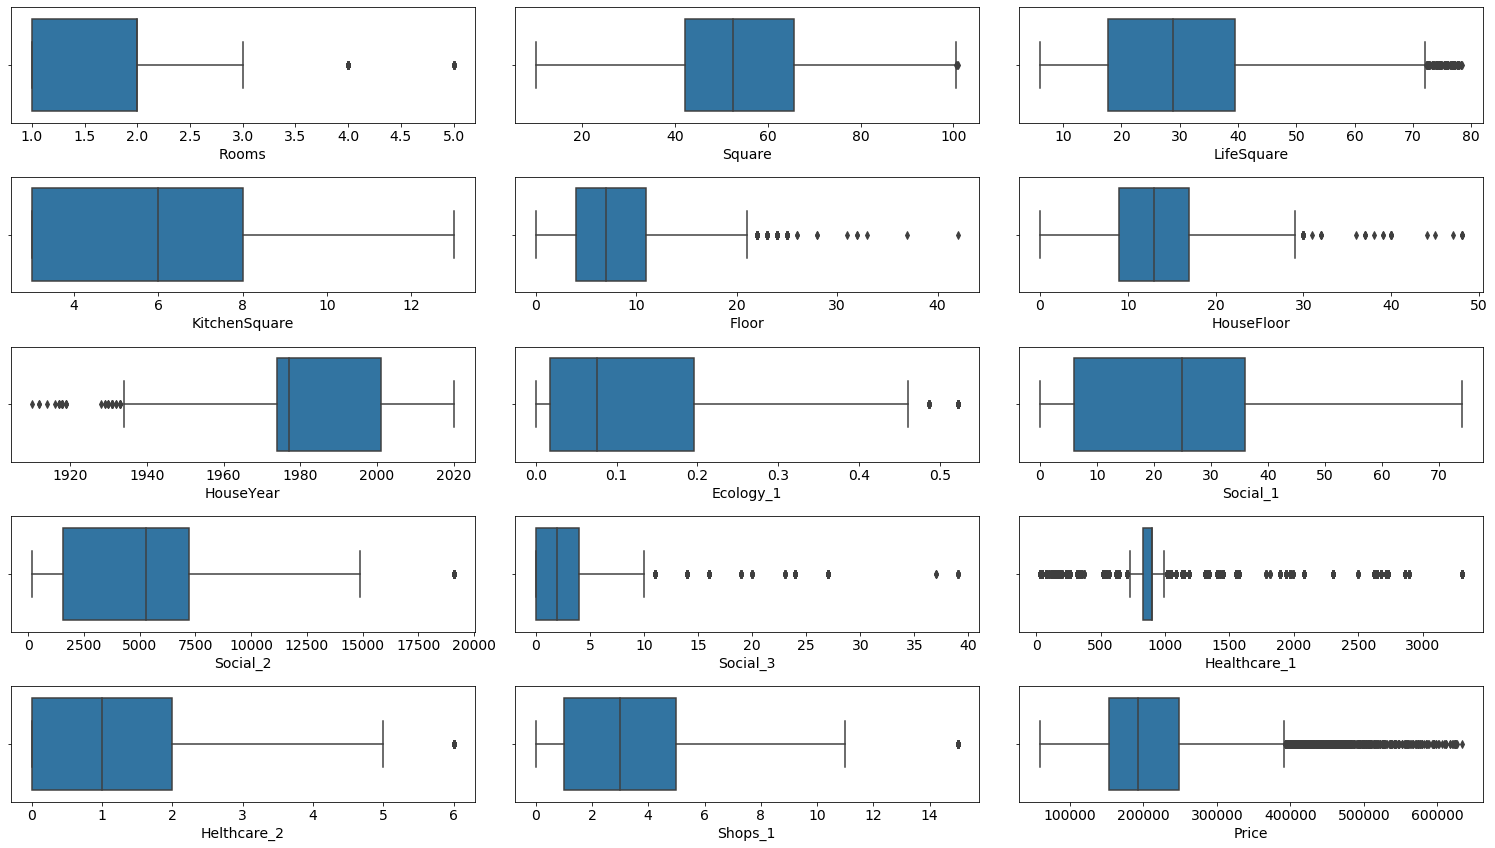

In [35]:
get_features_boxplot(train_df)

In [36]:
train_df.describe().round(2)

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00,10000.00,10000.00,10000.00,10000.0,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,1.89,55.11,28.14,6.24,7.7,12.59,1984.87,0.12,24.69,5352.16,3.04,954.96,1.32,3.56,214138.86
std,0.81,15.87,16.76,2.79,5.3,6.61,18.41,0.12,17.53,4006.80,4.41,571.91,1.49,3.44,92872.29
min,1.00,10.00,6.00,3.00,0.0,0.00,1910.00,0.00,0.00,168.00,0.00,30.00,0.00,0.00,59174.78
25%,1.00,42.21,17.63,3.00,4.0,9.00,1974.00,0.02,6.00,1564.00,0.00,830.00,0.00,1.00,153872.63
50%,2.00,52.51,28.92,6.00,7.0,13.00,1977.00,0.08,25.00,5285.00,2.00,900.00,1.00,3.00,192269.64
75%,2.00,65.56,39.42,8.00,11.0,17.00,2001.00,0.20,36.00,7227.00,4.00,900.00,2.00,5.00,249135.46
max,5.00,100.90,78.38,13.00,42.0,48.00,2020.00,0.52,74.00,19083.00,39.00,3300.00,6.00,15.00,633233.47


<i>Функция для предобработки выборок</i>

In [37]:
def data_preprocess(sample, basic_df):
    # Rooms
    sample.loc[sample["Rooms"] == 0, "Rooms"] = 1
    sample.loc[sample["Rooms"] >= 6, "Rooms"] = 5
    
    # HouseFloor
    sample.loc[sample["HouseFloor"] > 95, "HouseFloor"] = sample.loc[sample["HouseFloor"] <= 95, "HouseFloor"].max()
    
    # Floor
    sample.loc[sample["Floor"] > sample["HouseFloor"], "Floor"] = sample["HouseFloor"]
    
    # Square, LifeSquare & KitchenSquare
    sample.loc[sample["KitchenSquare"] < 3, "KitchenSquare"] = 3
    sample.loc[(sample["LifeSquare"] < 6) | (sample["LifeSquare"].isna()), "LifeSquare"] = 6
    sample.loc[sample["Square"] <= 10, "Square"] = 10
    
    sample.loc[sample["KitchenSquare"] > basic_df['KitchenSquare'].quantile(.975), "KitchenSquare"] = basic_df["KitchenSquare"].median()
    sample.loc[sample["LifeSquare"] > basic_df['LifeSquare'].quantile(.975), "LifeSquare"] = basic_df["LifeSquare"].median()
    sample.loc[sample["Square"] > basic_df['Square'].quantile(.975), "Square"] = basic_df["Square"].median()

    #sample.loc[sample["LifeSquare"] + sample["KitchenSquare"] > sample["Square"], "Square"] = sample["LifeSquare"] + sample["KitchenSquare"]

    # Shops_1, Social_3, Healthcare_1
    sample["Healthcare_1"] = sample["Healthcare_1"].fillna(basic_df["Healthcare_1"].median())
    
    sample.loc[sample["Shops_1"] > basic_df['Shops_1'].quantile(.95), "Shops_1"] = basic_df["Shops_1"].median()
    sample.loc[sample["Social_3"] > basic_df['Social_3'].quantile(.95), "Social_3"] = basic_df["Social_3"].median()
    sample.loc[(sample["Healthcare_1"] > basic_df['Healthcare_1'].quantile(.975)) | \
             (sample["Healthcare_1"] < basic_df['Healthcare_1'].quantile(.025)), "Healthcare_1"] \
        = basic_df["Healthcare_1"].median()
    
    # HouseYear
    sample.loc[sample["HouseYear"] > 2020, "HouseYear"] = 2020
    
    return sample

### 3.2 Обработка качественных и количественных признаков

<i>Бинарное кодирование (Feature Binarization)</i>

In [38]:
train_df["Ecology_2"].value_counts()

B    9903
A      97
Name: Ecology_2, dtype: int64

In [39]:
train_df["Ecology_3"].value_counts()

B    9725
A     275
Name: Ecology_3, dtype: int64

In [40]:
train_df["Shops_2"].value_counts()

B    9175
A     825
Name: Shops_2, dtype: int64

In [41]:
binary_values = {"B": 1, "A": 0}
train_df["Ecology_2"] = train_df["Ecology_2"].replace(binary_values)
train_df["Ecology_3"] = train_df["Ecology_3"].replace(binary_values)
train_df["Shops_2"] = train_df["Shops_2"].replace(binary_values)

In [42]:
train_df.head(10)

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
Id,,,,,,,,,,,,,,,,,,,
11809,27,3.0,52.513310,6.000000,10.0,4.0,10.0,2014.0,0.075424,1,1,11,3097,0.0,900.0,0,0.0,1,305018.871089
3013,22,1.0,39.832524,23.169223,8.0,7.0,8.0,1966.0,0.118537,1,1,30,6207,1.0,1183.0,1,0.0,1,177734.553407
8215,1,3.0,78.342215,47.671972,10.0,2.0,17.0,1988.0,0.025609,1,1,33,5261,0.0,240.0,3,1.0,1,282078.720850
2352,1,1.0,40.409907,6.000000,3.0,10.0,22.0,1977.0,0.007122,1,1,1,264,0.0,900.0,0,1.0,1,168106.007630
13866,94,2.0,64.285067,38.562517,9.0,16.0,16.0,1972.0,0.282798,1,1,33,8667,2.0,900.0,0,6.0,1,343995.102962
5804,99,3.0,62.528465,47.103833,6.0,9.0,9.0,1972.0,0.012339,1,1,35,5776,1.0,2078.0,2,4.0,1,161044.944138
8864,44,1.0,33.938750,21.772930,9.0,1.0,12.0,1968.0,0.232205,1,1,24,4860,1.0,80.0,0,3.0,1,142402.739272
13072,59,2.0,50.391814,32.893256,8.0,8.0,17.0,1986.0,0.019509,1,1,37,7687,11.0,176.0,5,5.0,1,326174.175191
9951,1,1.0,47.628132,44.628132,3.0,12.0,20.0,1977.0,0.007122,1,1,1,264,0.0,900.0,0,1.0,1,160400.401732


<i>Частотное кодирование </i>

In [43]:
district_quantity = pd.DataFrame(train_df["DistrictId"].value_counts().reset_index()).rename(columns={"index": "DistrictId", "DistrictId": "DistrictFrequency"})
district_quantity 

,DistrictId,DistrictFrequency
0,27,851
1,1,652
2,23,565
3,6,511
4,9,294
...,...,...
200,205,1
201,207,1
202,209,1
203,117,1


In [44]:
train_df = train_df.merge(district_quantity, on="DistrictId", how="left")
train_df.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,DistrictFrequency
0,27,3.0,52.513310,6.000000,10.0,4.0,10.0,2014.0,0.075424,1,1,11,3097,0.0,900.0,0,0.0,1,305018.871089,851
1,22,1.0,39.832524,23.169223,8.0,7.0,8.0,1966.0,0.118537,1,1,30,6207,1.0,1183.0,1,0.0,1,177734.553407,78
2,1,3.0,78.342215,47.671972,10.0,2.0,17.0,1988.0,0.025609,1,1,33,5261,0.0,240.0,3,1.0,1,282078.720850,652
3,1,1.0,40.409907,6.000000,3.0,10.0,22.0,1977.0,0.007122,1,1,1,264,0.0,900.0,0,1.0,1,168106.007630,652
4,94,2.0,64.285067,38.562517,9.0,16.0,16.0,1972.0,0.282798,1,1,33,8667,2.0,900.0,0,6.0,1,343995.102962,89


## Этап 4. Анализ взаимосвязей переменных

### 4.1 Выделение новых признаков

##### MedPriceByLifeSquarePerRoom

In [45]:
train_df.insert(3,"LifeSquarePerRoom", (train_df["LifeSquare"] / train_df["Rooms"]).round(0)) # значение площади, отведённой на 1 комнату
train_df.tail(10)

,DistrictId,Rooms,Square,LifeSquarePerRoom,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,DistrictFrequency
9990,21,1.0,18.983962,11.0,11.419796,3.0,1.0,5.0,1967.0,0.194489,...,1,47,8004,3.0,125.0,3,5.0,1,112411.221700,165
9991,6,2.0,62.648779,3.0,6.000000,3.0,6.0,17.0,1977.0,0.243205,...,1,5,1564,0.0,540.0,0,0.0,1,182625.548872,511
9992,37,2.0,50.902724,14.0,27.159548,6.0,4.0,9.0,1972.0,0.127812,...,1,28,7287,5.0,320.0,1,3.0,1,196641.468817,72
9993,1,3.0,84.486078,10.0,28.926861,3.0,4.0,22.0,2016.0,0.007122,...,1,1,264,0.0,900.0,0,1.0,1,264213.558631,652
9994,9,1.0,43.303458,22.0,21.519087,8.0,12.0,14.0,1992.0,0.161532,...,1,25,5648,1.0,30.0,2,4.0,1,136744.340827,294
9995,61,2.0,49.090728,17.0,33.272626,6.0,3.0,12.0,1981.0,0.300323,...,1,52,10311,6.0,900.0,1,9.0,1,119367.455796,118
9996,27,2.0,64.307684,19.0,37.038420,9.0,0.0,0.0,1977.0,0.072158,...,1,2,629,1.0,900.0,0,0.0,0,199715.148807,851
9997,178,1.0,29.648057,17.0,16.555363,5.0,3.0,5.0,1958.0,0.460556,...,1,20,4386,14.0,900.0,1,5.0,1,165953.912580,7
9998,21,1.0,32.330292,22.0,22.326870,5.0,3.0,9.0,1969.0,0.194489,...,1,47,8004,3.0,125.0,3,5.0,1,171842.411855,165
9999,94,1.0,35.815476,22.0,22.301367,6.0,9.0,9.0,1975.0,0.127376,...,1,43,8429,3.0,900.0,3,9.0,1,177685.627486,89


In [46]:
med_price_by_lifesquareperroom = train_df.groupby(["LifeSquarePerRoom"], as_index=False).agg({"Price":"median"}).\
                                            rename(columns={"Price":"MedPriceByLifeSquarePerRoom"})
med_price_by_lifesquareperroom.head(10)

,LifeSquarePerRoom,MedPriceByLifeSquarePerRoom
0,1.0,232431.298872
1,2.0,223171.158938
2,3.0,183213.528975
3,4.0,78364.616704
4,5.0,143688.076514
5,6.0,130627.227848
6,7.0,349451.706201
7,8.0,201697.056690
8,9.0,118900.634813
9,10.0,243340.074964


In [47]:
train_df = train_df.merge(med_price_by_lifesquareperroom, on=["LifeSquarePerRoom"], how="left")
train_df.head(10)

,DistrictId,Rooms,Square,LifeSquarePerRoom,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,DistrictFrequency,MedPriceByLifeSquarePerRoom
0,27,3.0,52.513310,2.0,6.000000,10.0,4.0,10.0,2014.0,0.075424,...,11,3097,0.0,900.0,0,0.0,1,305018.871089,851,223171.158938
1,22,1.0,39.832524,23.0,23.169223,8.0,7.0,8.0,1966.0,0.118537,...,30,6207,1.0,1183.0,1,0.0,1,177734.553407,78,176658.021989
2,1,3.0,78.342215,16.0,47.671972,10.0,2.0,17.0,1988.0,0.025609,...,33,5261,0.0,240.0,3,1.0,1,282078.720850,652,234644.061904
3,1,1.0,40.409907,6.0,6.000000,3.0,10.0,22.0,1977.0,0.007122,...,1,264,0.0,900.0,0,1.0,1,168106.007630,652,130627.227848
4,94,2.0,64.285067,19.0,38.562517,9.0,16.0,16.0,1972.0,0.282798,...,33,8667,2.0,900.0,0,6.0,1,343995.102962,89,186304.501613
5,99,3.0,62.528465,16.0,47.103833,6.0,9.0,9.0,1972.0,0.012339,...,35,5776,1.0,2078.0,2,4.0,1,161044.944138,97,234644.061904
6,44,1.0,33.938750,22.0,21.772930,9.0,1.0,12.0,1968.0,0.232205,...,24,4860,1.0,80.0,0,3.0,1,142402.739272,104,170455.930747
7,59,2.0,50.391814,16.0,32.893256,8.0,8.0,17.0,1986.0,0.019509,...,37,7687,11.0,176.0,5,5.0,1,326174.175191,67,234644.061904
8,1,1.0,47.628132,45.0,44.628132,3.0,12.0,20.0,1977.0,0.007122,...,1,264,0.0,900.0,0,1.0,1,160400.401732,652,139961.946572
9,6,3.0,79.867477,25.0,75.085125,3.0,3.0,17.0,2014.0,0.243205,...,5,1564,0.0,540.0,0,0.0,1,194756.023945,511,169876.764789


##### MedPriceByDistrict

In [48]:
med_price_by_district = train_df.groupby(["DistrictId"], as_index=False).agg({"Price":"median"}).\
                                            rename(columns={"Price":"MedPriceByDistrict"})
med_price_by_district.head(10)

,DistrictId,MedPriceByDistrict
0,0,165963.054142
1,1,183663.443595
2,10,217749.656911
3,100,234032.836228
4,101,184276.502773
5,102,172906.875627
6,103,253670.908348
7,104,366925.273946
8,105,197225.709107
9,106,267311.508795


In [49]:
train_df = train_df.merge(med_price_by_district, on=["DistrictId"], how="left")
train_df.head(10)

,DistrictId,Rooms,Square,LifeSquarePerRoom,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,DistrictFrequency,MedPriceByLifeSquarePerRoom,MedPriceByDistrict
0,27,3.0,52.513310,2.0,6.000000,10.0,4.0,10.0,2014.0,0.075424,...,3097,0.0,900.0,0,0.0,1,305018.871089,851,223171.158938,146171.433190
1,22,1.0,39.832524,23.0,23.169223,8.0,7.0,8.0,1966.0,0.118537,...,6207,1.0,1183.0,1,0.0,1,177734.553407,78,176658.021989,183678.134031
2,1,3.0,78.342215,16.0,47.671972,10.0,2.0,17.0,1988.0,0.025609,...,5261,0.0,240.0,3,1.0,1,282078.720850,652,234644.061904,183663.443595
3,1,1.0,40.409907,6.0,6.000000,3.0,10.0,22.0,1977.0,0.007122,...,264,0.0,900.0,0,1.0,1,168106.007630,652,130627.227848,183663.443595
4,94,2.0,64.285067,19.0,38.562517,9.0,16.0,16.0,1972.0,0.282798,...,8667,2.0,900.0,0,6.0,1,343995.102962,89,186304.501613,181706.718894
5,99,3.0,62.528465,16.0,47.103833,6.0,9.0,9.0,1972.0,0.012339,...,5776,1.0,2078.0,2,4.0,1,161044.944138,97,234644.061904,178829.166450
6,44,1.0,33.938750,22.0,21.772930,9.0,1.0,12.0,1968.0,0.232205,...,4860,1.0,80.0,0,3.0,1,142402.739272,104,170455.930747,208164.464747
7,59,2.0,50.391814,16.0,32.893256,8.0,8.0,17.0,1986.0,0.019509,...,7687,11.0,176.0,5,5.0,1,326174.175191,67,234644.061904,318772.374740
8,1,1.0,47.628132,45.0,44.628132,3.0,12.0,20.0,1977.0,0.007122,...,264,0.0,900.0,0,1.0,1,160400.401732,652,139961.946572,183663.443595
9,6,3.0,79.867477,25.0,75.085125,3.0,3.0,17.0,2014.0,0.243205,...,1564,0.0,540.0,0,0.0,1,194756.023945,511,169876.764789,168980.370846


##### MedPriceByYear

In [50]:
med_price_by_year = train_df.groupby(["HouseYear"], as_index=False).agg({"Price":"median"}).\
                                            rename(columns={"Price":"MedPriceByYear"})
med_price_by_year.head(10)

,HouseYear,MedPriceByYear
0,1910.0,287954.720682
1,1912.0,273582.386509
2,1914.0,423580.477982
3,1916.0,284608.939261
4,1917.0,236830.764637
5,1918.0,443270.817520
6,1919.0,321506.277104
7,1928.0,324303.812481
8,1929.0,288889.078292
9,1930.0,300001.927452


In [51]:
train_df = train_df.merge(med_price_by_year, on=["HouseYear"], how="left")
train_df.head(10)

,DistrictId,Rooms,Square,LifeSquarePerRoom,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,DistrictFrequency,MedPriceByLifeSquarePerRoom,MedPriceByDistrict,MedPriceByYear
0,27,3.0,52.513310,2.0,6.000000,10.0,4.0,10.0,2014.0,0.075424,...,0.0,900.0,0,0.0,1,305018.871089,851,223171.158938,146171.433190,163774.557665
1,22,1.0,39.832524,23.0,23.169223,8.0,7.0,8.0,1966.0,0.118537,...,1.0,1183.0,1,0.0,1,177734.553407,78,176658.021989,183678.134031,182121.744891
2,1,3.0,78.342215,16.0,47.671972,10.0,2.0,17.0,1988.0,0.025609,...,0.0,240.0,3,1.0,1,282078.720850,652,234644.061904,183663.443595,226928.198571
3,1,1.0,40.409907,6.0,6.000000,3.0,10.0,22.0,1977.0,0.007122,...,0.0,900.0,0,1.0,1,168106.007630,652,130627.227848,183663.443595,168658.344363
4,94,2.0,64.285067,19.0,38.562517,9.0,16.0,16.0,1972.0,0.282798,...,2.0,900.0,0,6.0,1,343995.102962,89,186304.501613,181706.718894,201105.303784
5,99,3.0,62.528465,16.0,47.103833,6.0,9.0,9.0,1972.0,0.012339,...,1.0,2078.0,2,4.0,1,161044.944138,97,234644.061904,178829.166450,201105.303784
6,44,1.0,33.938750,22.0,21.772930,9.0,1.0,12.0,1968.0,0.232205,...,1.0,80.0,0,3.0,1,142402.739272,104,170455.930747,208164.464747,189458.755027
7,59,2.0,50.391814,16.0,32.893256,8.0,8.0,17.0,1986.0,0.019509,...,11.0,176.0,5,5.0,1,326174.175191,67,234644.061904,318772.374740,238662.026433
8,1,1.0,47.628132,45.0,44.628132,3.0,12.0,20.0,1977.0,0.007122,...,0.0,900.0,0,1.0,1,160400.401732,652,139961.946572,183663.443595,168658.344363
9,6,3.0,79.867477,25.0,75.085125,3.0,3.0,17.0,2014.0,0.243205,...,0.0,540.0,0,0.0,1,194756.023945,511,169876.764789,168980.370846,163774.557665


##### MedPriceByFloorToHouseFloor

In [52]:
med_price_by_floor_to_housefloor = train_df.groupby(["Floor", "HouseFloor"], as_index=False).agg({"Price":"median"}).\
                                            rename(columns={"Price":"MedPriceByFloorToHouseFloor"})
med_price_by_floor_to_housefloor.head(10)

,Floor,HouseFloor,MedPriceByFloorToHouseFloor
0,0.0,0.0,177511.314827
1,1.0,1.0,185338.851196
2,1.0,2.0,242956.031432
3,1.0,3.0,170924.690178
4,1.0,4.0,128007.275095
5,1.0,5.0,169369.971269
6,1.0,7.0,203766.877302
7,1.0,8.0,192721.796953
8,1.0,9.0,178267.634151
9,1.0,10.0,200021.835127


In [53]:
train_df = train_df.merge(med_price_by_floor_to_housefloor, on=["Floor", "HouseFloor"], how="left")
train_df.head(10)

,DistrictId,Rooms,Square,LifeSquarePerRoom,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,DistrictFrequency,MedPriceByLifeSquarePerRoom,MedPriceByDistrict,MedPriceByYear,MedPriceByFloorToHouseFloor
0,27,3.0,52.513310,2.0,6.000000,10.0,4.0,10.0,2014.0,0.075424,...,900.0,0,0.0,1,305018.871089,851,223171.158938,146171.433190,163774.557665,301197.730833
1,22,1.0,39.832524,23.0,23.169223,8.0,7.0,8.0,1966.0,0.118537,...,1183.0,1,0.0,1,177734.553407,78,176658.021989,183678.134031,182121.744891,326791.164244
2,1,3.0,78.342215,16.0,47.671972,10.0,2.0,17.0,1988.0,0.025609,...,240.0,3,1.0,1,282078.720850,652,234644.061904,183663.443595,226928.198571,168581.529424
3,1,1.0,40.409907,6.0,6.000000,3.0,10.0,22.0,1977.0,0.007122,...,900.0,0,1.0,1,168106.007630,652,130627.227848,183663.443595,168658.344363,261520.643011
4,94,2.0,64.285067,19.0,38.562517,9.0,16.0,16.0,1972.0,0.282798,...,900.0,0,6.0,1,343995.102962,89,186304.501613,181706.718894,201105.303784,229983.577920
5,99,3.0,62.528465,16.0,47.103833,6.0,9.0,9.0,1972.0,0.012339,...,2078.0,2,4.0,1,161044.944138,97,234644.061904,178829.166450,201105.303784,197284.444429
6,44,1.0,33.938750,22.0,21.772930,9.0,1.0,12.0,1968.0,0.232205,...,80.0,0,3.0,1,142402.739272,104,170455.930747,208164.464747,189458.755027,158785.531691
7,59,2.0,50.391814,16.0,32.893256,8.0,8.0,17.0,1986.0,0.019509,...,176.0,5,5.0,1,326174.175191,67,234644.061904,318772.374740,238662.026433,175492.154294
8,1,1.0,47.628132,45.0,44.628132,3.0,12.0,20.0,1977.0,0.007122,...,900.0,0,1.0,1,160400.401732,652,139961.946572,183663.443595,168658.344363,162736.113727
9,6,3.0,79.867477,25.0,75.085125,3.0,3.0,17.0,2014.0,0.243205,...,540.0,0,0.0,1,194756.023945,511,169876.764789,168980.370846,163774.557665,178467.117151


In [54]:
cols = list(train_df.columns.values)
columnsList = cols[:19] + ["DistrictFrequency", "MedPriceByDistrict", "MedPriceByLifeSquarePerRoom", "MedPriceByYear", "MedPriceByFloorToHouseFloor", "Price"]
train_df=train_df.reindex(columns=columnsList)
train_df.head()

,DistrictId,Rooms,Square,LifeSquarePerRoom,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Healthcare_1,Helthcare_2,Shops_1,Shops_2,DistrictFrequency,MedPriceByDistrict,MedPriceByLifeSquarePerRoom,MedPriceByYear,MedPriceByFloorToHouseFloor,Price
0,27,3.0,52.513310,2.0,6.000000,10.0,4.0,10.0,2014.0,0.075424,...,900.0,0,0.0,1,851,146171.433190,223171.158938,163774.557665,301197.730833,305018.871089
1,22,1.0,39.832524,23.0,23.169223,8.0,7.0,8.0,1966.0,0.118537,...,1183.0,1,0.0,1,78,183678.134031,176658.021989,182121.744891,326791.164244,177734.553407
2,1,3.0,78.342215,16.0,47.671972,10.0,2.0,17.0,1988.0,0.025609,...,240.0,3,1.0,1,652,183663.443595,234644.061904,226928.198571,168581.529424,282078.720850
3,1,1.0,40.409907,6.0,6.000000,3.0,10.0,22.0,1977.0,0.007122,...,900.0,0,1.0,1,652,183663.443595,130627.227848,168658.344363,261520.643011,168106.007630
4,94,2.0,64.285067,19.0,38.562517,9.0,16.0,16.0,1972.0,0.282798,...,900.0,0,6.0,1,89,181706.718894,186304.501613,201105.303784,229983.577920,343995.102962


<i>Функция для генерации новых признаков</i>

In [55]:
def feature_generate(sample, basic_predictors, basic_target):
    basic_predictors = basic_predictors.copy()
    basic_predictors["Price"] = basic_target.values
    
    # Бинарное кодирование (Feature Binarization)
    binary_values = {"B": 1, "A": 0}
    sample["Ecology_2"] = sample["Ecology_2"].replace(binary_values)
    sample["Ecology_3"] = sample["Ecology_3"].replace(binary_values)
    sample["Shops_2"] = sample["Shops_2"].replace(binary_values)
    
    # Частотное кодирование
    district_quantity = pd.DataFrame(basic_predictors["DistrictId"].value_counts().reset_index()).rename(columns={"index": "DistrictId", "DistrictId": "DistrictFrequency"})
    sample = sample.merge(district_quantity, on="DistrictId", how="left")
    sample["DistrictFrequency"] = sample["DistrictFrequency"].fillna(sample["DistrictFrequency"].median()) 
    
    # MedPriceByLifeSquarePerRoom
    if "LifeSquarePerRoom" not in basic_predictors.columns: 
        basic_predictors.insert(3,"LifeSquarePerRoom", (basic_predictors["LifeSquare"] / basic_predictors["Rooms"]).round(0))
   
    med_price_by_lifesquareperroom = basic_predictors.groupby(["LifeSquarePerRoom"], as_index=False).agg({"Price":"median"}).\
                                            rename(columns={"Price":"MedPriceByLifeSquarePerRoom"})
    
    sample.insert(3,"LifeSquarePerRoom", (sample["LifeSquare"] / sample["Rooms"]).round(0))
    sample = sample.merge(med_price_by_lifesquareperroom, on=["LifeSquarePerRoom"], how="left")
    
    sample["MedPriceByLifeSquarePerRoom"] = sample["MedPriceByLifeSquarePerRoom"].fillna(sample["MedPriceByLifeSquarePerRoom"].median()) 
    
    # MedPriceByDistrict
    med_price_by_district = basic_predictors.groupby(["DistrictId"], as_index=False).agg({"Price":"median"}).\
                                            rename(columns={"Price":"MedPriceByDistrict"})
    sample = sample.merge(med_price_by_district, on=["DistrictId"], how="left")
    sample["MedPriceByDistrict"] = sample["MedPriceByDistrict"].fillna(sample["MedPriceByDistrict"].median()) 
    
    # MedPriceByYear
    med_price_by_year = basic_predictors.groupby(["HouseYear"], as_index=False).agg({"Price":"median"}).\
                                            rename(columns={"Price":"MedPriceByYear"})
    sample = sample.merge(med_price_by_year, on=["HouseYear"], how="left")
    sample["MedPriceByYear"] = sample["MedPriceByYear"].fillna(sample["MedPriceByYear"].median()) 
    
    # MedPriceByFloorToHouseFloor
    med_price_by_floor_to_housefloor = basic_predictors.groupby(["Floor", "HouseFloor"], as_index=False).agg({"Price":"median"}).\
                                            rename(columns={"Price":"MedPriceByFloorToHouseFloor"})
    sample = sample.merge(med_price_by_floor_to_housefloor, on=["Floor", "HouseFloor"], how="left")
    sample["MedPriceByFloorToHouseFloor"] = sample["MedPriceByFloorToHouseFloor"].fillna(sample["MedPriceByFloorToHouseFloor"].median()) 
        
    return sample

### 4.2 Корреляционная матрица

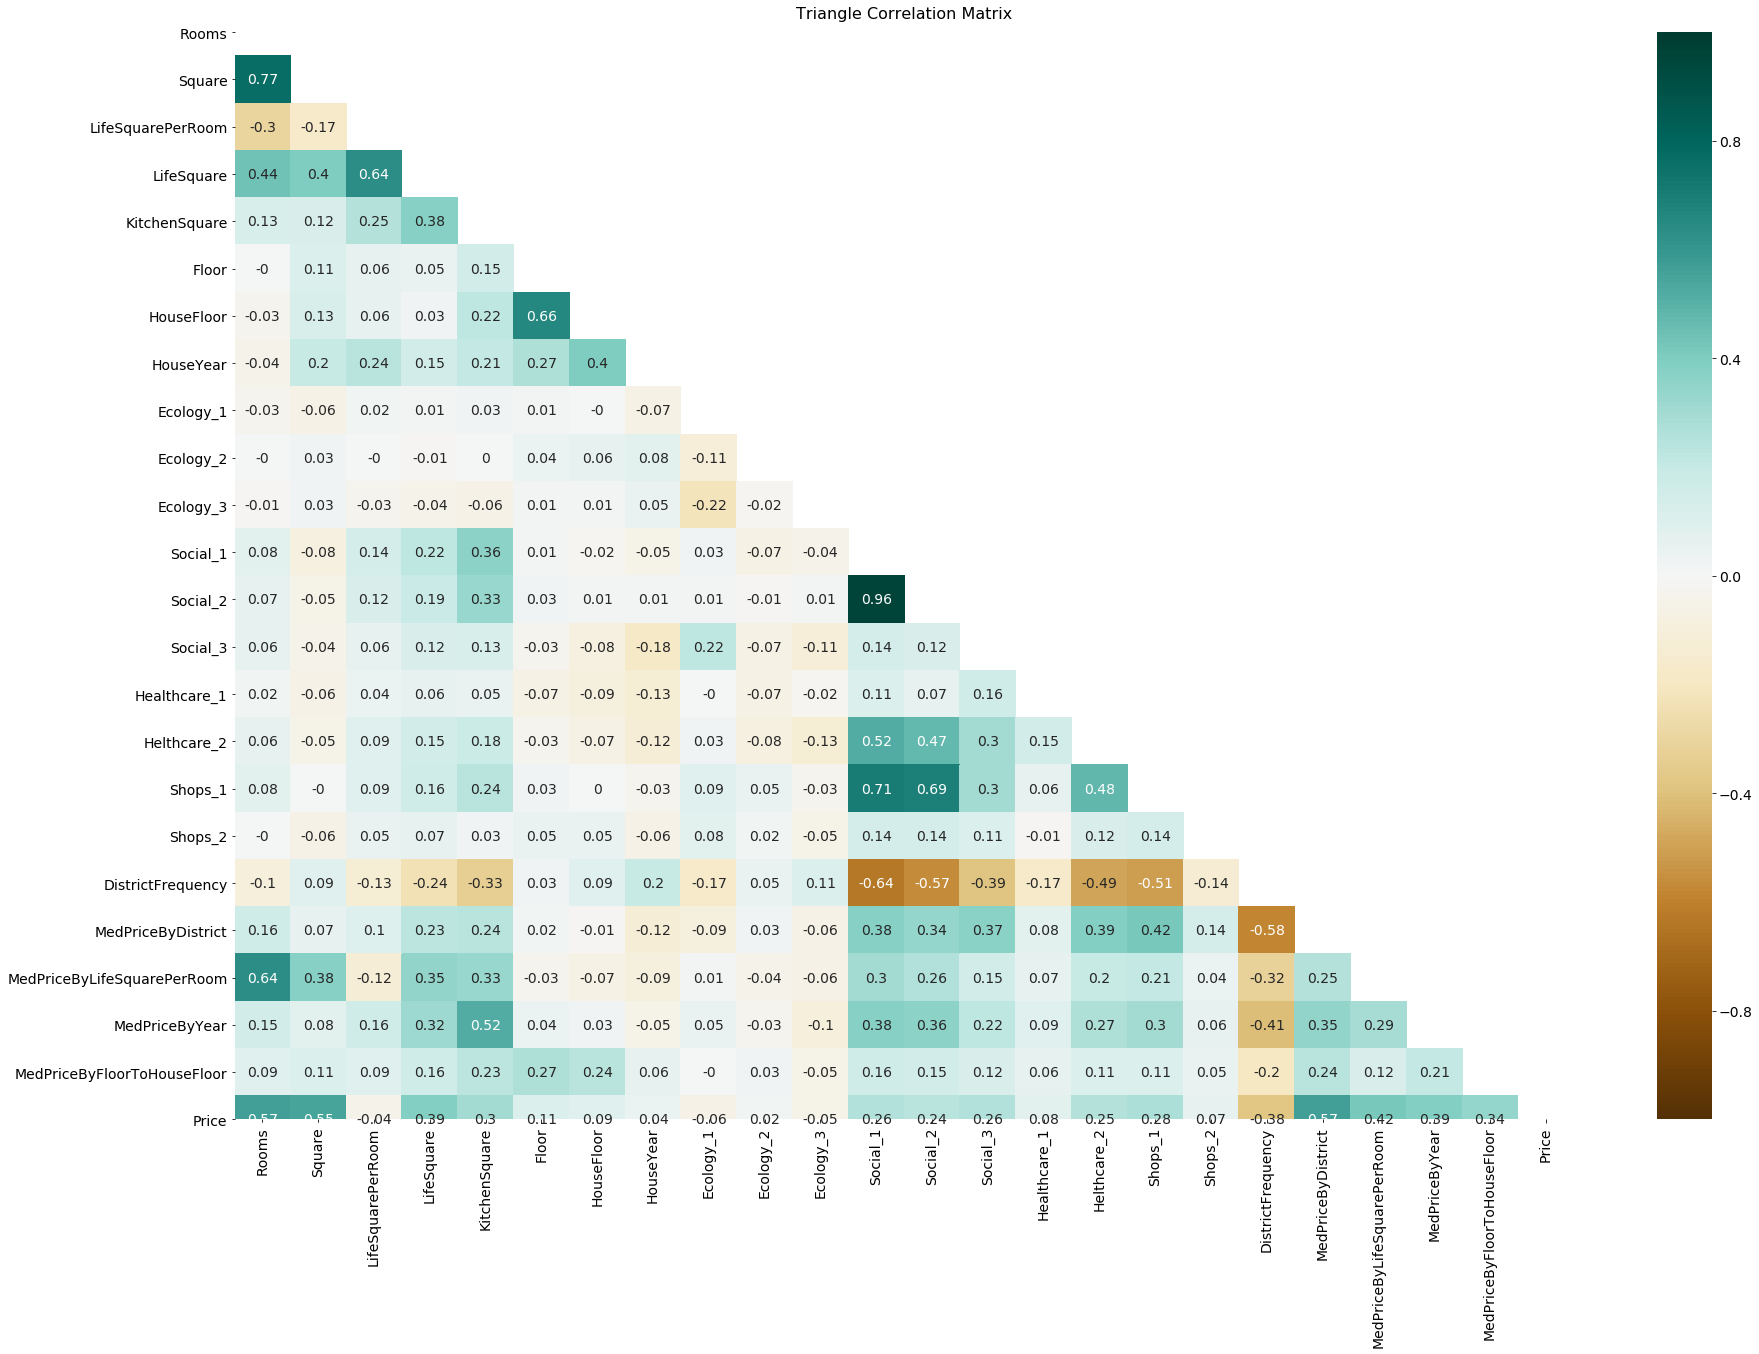

In [56]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30, 20))
mask = np.triu(np.ones_like(train_df.corr().round(2), dtype=np.bool))
heatmap = sns.heatmap(train_df.corr().round(2), mask=mask, vmin=-1, vmax=1, annot=True, cmap="BrBG")
heatmap.set_title("Triangle Correlation Matrix", fontdict={"fontsize":16}, pad=14);

### 4.3 Отбор признаков для построения модели

In [57]:
final_columns = ["MedPriceByDistrict", "Square", "MedPriceByLifeSquarePerRoom", "LifeSquare", "KitchenSquare", "Social_2", "Social_3", "Helthcare_2", "Shops_1", "MedPriceByYear", "MedPriceByFloorToHouseFloor"]
train_model_data = train_df[final_columns + ["Price"]]
train_model_data.head()

,MedPriceByDistrict,Square,MedPriceByLifeSquarePerRoom,LifeSquare,KitchenSquare,Social_2,Social_3,Helthcare_2,Shops_1,MedPriceByYear,MedPriceByFloorToHouseFloor,Price
0,146171.433190,52.513310,223171.158938,6.000000,10.0,3097,0.0,0,0.0,163774.557665,301197.730833,305018.871089
1,183678.134031,39.832524,176658.021989,23.169223,8.0,6207,1.0,1,0.0,182121.744891,326791.164244,177734.553407
2,183663.443595,78.342215,234644.061904,47.671972,10.0,5261,0.0,3,1.0,226928.198571,168581.529424,282078.720850
3,183663.443595,40.409907,130627.227848,6.000000,3.0,264,0.0,0,1.0,168658.344363,261520.643011,168106.007630
4,181706.718894,64.285067,186304.501613,38.562517,9.0,8667,2.0,0,6.0,201105.303784,229983.577920,343995.102962


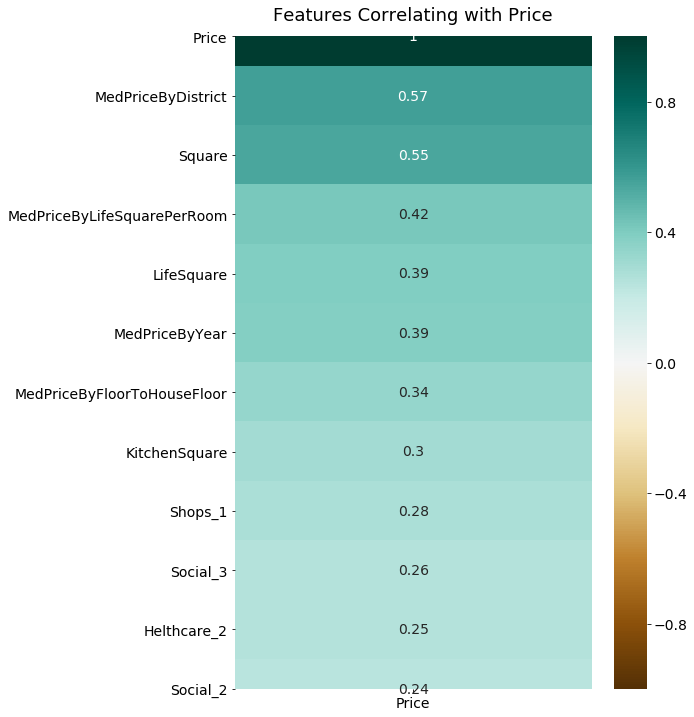

In [58]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(train_model_data.corr()[["Price"]].sort_values(by="Price", ascending=False), vmin=-1, vmax=1, annot=True, cmap="BrBG")
heatmap.set_title("Features Correlating with Price", fontdict={"fontsize":18}, pad=16);

## Этап 5. Построение модели

### 5.1 Разбиение данных на train и test выборки

In [59]:
train_df = pd.read_csv(TRAIN_DATASET_PATH)
test_df = pd.read_csv(TEST_DATASET_PATH)

x = train_df.drop(columns=["Price"])
y = train_df[["Price"]]

In [60]:
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.2, shuffle=True, random_state = 42)

In [61]:
x_train = data_preprocess(x_train, x_train)
x_valid = data_preprocess(x_valid, x_train)
test_df = data_preprocess(test_df, x_train)

x_train.shape, x_valid.shape, test_df.shape

((8000, 19), (2000, 19), (5000, 19))

In [62]:
x_train = feature_generate(x_train, x_train, y_train)
x_valid = feature_generate(x_valid, x_train, y_train)
test_df = feature_generate(test_df, x_train, y_train)

x_train = x_train[final_columns]
x_valid = x_valid[final_columns]
test_df = test_df[final_columns]

x_train.shape, x_valid.shape, test_df.shape

((8000, 11), (2000, 11), (5000, 11))

In [63]:
x_train.isna().sum().sum(), x_valid.isna().sum().sum(), test_df.isna().sum().sum()

(0, 0, 0)

### 5.2 Обучение модели

In [64]:
rf_model = RandomForestRegressor(max_depth=18, n_estimators=1500, random_state=42, criterion='mse')
rf_model.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=18,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1500,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

### 5.3 Оценка модели

In [65]:
y_valid_preds = rf_model.predict(x_valid)

In [66]:
test_results = pd.DataFrame({
    "y_valid": y_valid["Price"],
    "y_pred": y_valid_preds.flatten(),
})

test_results.head(15)

,y_valid,y_pred
6252,225202.099645,223483.596772
4684,361744.269547,267336.144488
1731,275055.182201,215710.399548
4742,198133.702204,204854.950517
4521,221299.460377,192126.649064
6340,221920.853310,264388.350208
576,362498.306762,344361.004436
5202,185991.006440,162437.944020
6363,185230.373774,178046.162135
439,154170.219034,170084.029280


In [67]:
r2(y_valid_preds, y_valid["Price"])

0.5837423273394293

### 5.4 Кросс-валидация

In [68]:
cv_score = cross_val_score(rf_model, x_train, y_train, scoring='r2', cv=KFold(n_splits=3, shuffle=True, random_state=42))
cv_score

array([0.72045852, 0.72689595, 0.72928798])

In [69]:
cv_score.mean()

0.725547484683844

### 5.5 Важность предикатов

In [70]:
feature_importances = pd.DataFrame(zip(x_train.columns, rf_model.feature_importances_), 
                                   columns=['feature_name', 'importance'])

feature_importances.sort_values(by='importance', ascending=False)

,feature_name,importance
1,Square,0.403640
0,MedPriceByDistrict,0.344100
9,MedPriceByYear,0.055589
10,MedPriceByFloorToHouseFloor,0.045503
5,Social_2,0.038254
3,LifeSquare,0.030256
2,MedPriceByLifeSquarePerRoom,0.021547
6,Social_3,0.020794
4,KitchenSquare,0.017127
8,Shops_1,0.013998


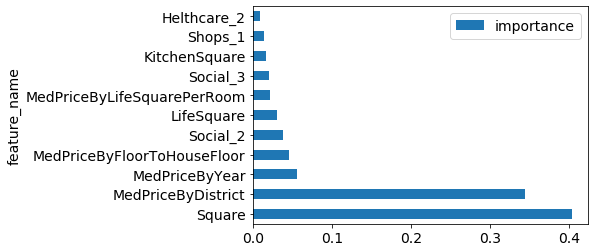

In [71]:
feature_importances = feature_importances.sort_values(by='importance', ascending=False)
feature_importances.set_index("feature_name", inplace=True)
feature_importances.plot(kind='barh')

### 5.6 Прогноз таргета

In [72]:
submit = pd.read_csv('sample_submission.csv')
submit.head(10)

,Id,Price
0,4567,200000.0
1,5925,200000.0
2,960,200000.0
3,3848,200000.0
4,746,200000.0
5,868,200000.0
6,672,200000.0
7,2471,200000.0
8,4510,200000.0
9,8354,200000.0


In [73]:
target_predictions = rf_model.predict(test_df)
target_predictions

array([155887.05678758, 117909.62451344, 136320.08700884, ...,
       147163.88673608, 187011.60071494, 248367.2168032 ])

In [74]:
submit['Price'] = target_predictions
submit.head(10)

,Id,Price
0,4567,155887.056788
1,5925,117909.624513
2,960,136320.087009
3,3848,119037.446755
4,746,184224.665246
5,868,450907.896881
6,672,106435.866512
7,2471,204977.749152
8,4510,135311.555668
9,8354,263888.490097


In [75]:
submit.to_csv('rf_submit.csv', index=False)